In [7]:
import argparse
import multiprocessing
from pathlib import Path
from pprint import pprint

import numpy

from become_yukarin.acoustic_converter import AcousticConverter
from become_yukarin.config.config import create_from_json as create_config
from become_yukarin.data_struct import AcousticFeature
from become_yukarin.dataset.dataset import AcousticFeatureLoadProcess
from become_yukarin.dataset.dataset import AcousticFeatureProcess
from become_yukarin.dataset.dataset import AcousticFeatureSaveProcess
from become_yukarin.dataset.dataset import WaveFileLoadProcess
from become_yukarin.dataset.utility import MFCCAligner
from become_yukarin.param import AcousticFeatureParam
from become_yukarin.param import VoiceParam

import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib inline

In [2]:
path_directory = Path('/mnt/dwango/hiroshiba/become-yukarin/dataset/aligned-feature/aligned-yukari-pause-hiho-pause-atr-notopdb-smart-order8-preconvert/hiho-pause/')
acoustic_feature_load_process = AcousticFeatureLoadProcess(validate=False)

In [5]:
f0_list = []
for path in path_directory.glob('hiho-pause-atr-*.npy'):
    feature = acoustic_feature_load_process(path)
    f0_list.append(feature.f0[feature.voiced])  # remove unvoiced

f0s = numpy.concatenate(f0_list)

min 58.5114
max 656.013
0.01% 65.3572038666
0.1% 70.7347505264
1% 77.3837511444
99.99% 523.6955354
99.9% 291.841960754
99% 202.019358521


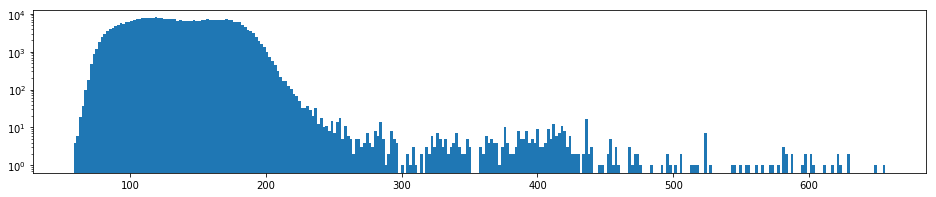

In [18]:
fig = plt.figure(figsize=[16, 3])

_ = plt.hist(f0s, bins=300, log=True)
print('min', f0s.min())
print('max', f0s.max())

print('0.01%', numpy.percentile(f0s, 0.01))
print('0.1%', numpy.percentile(f0s, 0.1))
print('1%', numpy.percentile(f0s, 1))

print('99.99%', numpy.percentile(f0s, 99.99))
print('99.9%', numpy.percentile(f0s, 99.9))
print('99%', numpy.percentile(f0s, 99))